In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import random as rd
import seaborn as sns

from math import log2, exp, factorial
from statistics import median

n = 25
data = np.random.exponential(scale=1, size=n)
data

array([1.56227006, 0.16646455, 1.71439298, 0.02157945, 0.2608    ,
       2.40123422, 2.01563565, 0.82739193, 0.55941131, 2.04171237,
       3.30740797, 0.07462907, 3.83509004, 3.83197524, 0.36578789,
       0.96652969, 2.17431482, 0.68535522, 0.24842194, 0.5257239 ,
       1.16419619, 0.35765198, 0.197799  , 1.76680659, 0.10248953])

In [2]:
_, counts = np.unique(data, return_counts=True)
moda = np.where(counts == counts.max()) # мода
moda # по этим индексам в data лежат нужные значения

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)

In [3]:
median(data) # медиана

0.8273919263306797

In [4]:
max(data) - min(data) # размах

3.813510587118434

In [5]:
def M(data):
    return sum(data)/len(data)
mu3 = M([(x - M(data))**3 for x in data])
mu2 = M([(x - M(data))**2 for x in data])
mu3/(mu2)**1.5 # коэффицент ассиметрии

0.9214142990457278

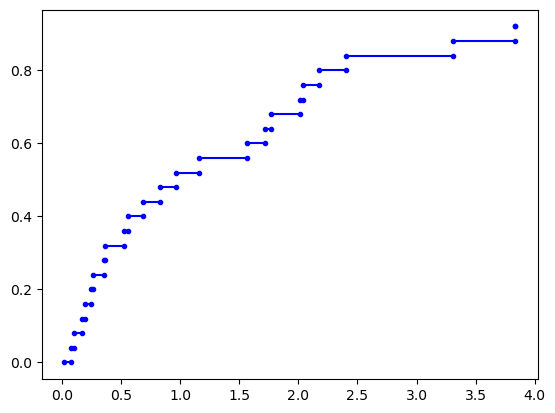

In [6]:
data.sort()
for i in range(n-1):
    plt.plot([data[i], data[i+1]], [i/n, i/n], marker = 'o', color = 'blue', ms = 3)
plt.show() # эмпирическая функция распределения

(0.0, 0.8793413759245622)

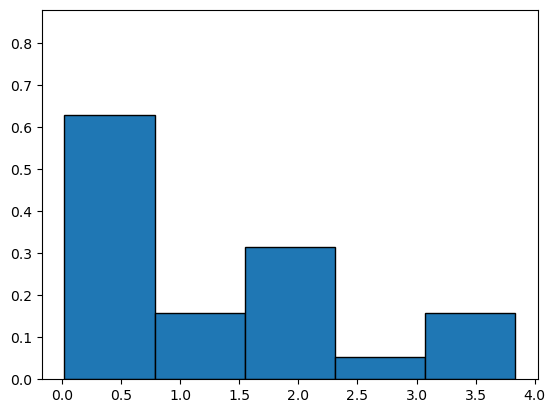

In [7]:
k = int(1 + log2(n))
delta = (max(data) - min(data)) / k 

maximim = 0
_, _, rec = plt.hist(data, bins = k, ec='k')
for r in rec:
    r.set_height(r.get_height()/len(data)/r.get_width())
    maximim = max(maximim, r.get_height())

plt.ylim([0, maximim + 0.25])

<Axes: >

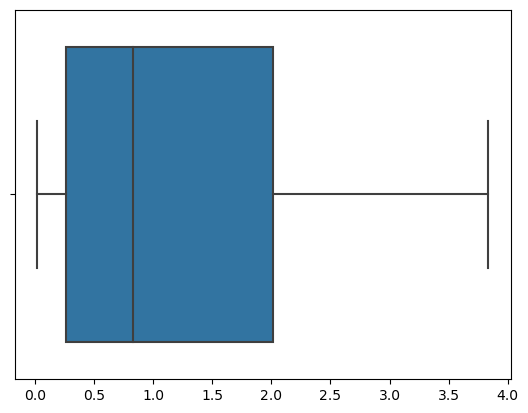

In [8]:
sns.boxplot(x = data) # boxplot

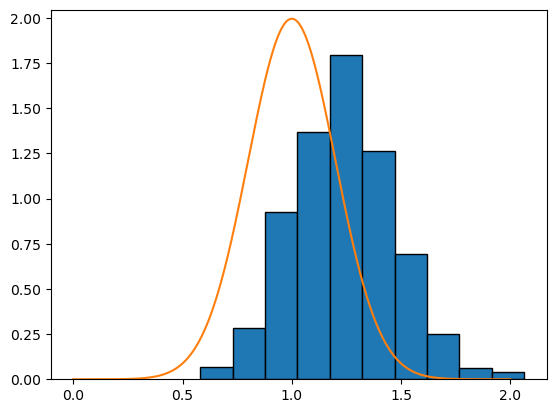

In [9]:
N = 1000

def N_(a, D, x):
    return 1/(D*2*np.pi)**0.5 * exp(-(x-a)**2/(2*D))

k1 = int(1 + log2(N))

data_bootstrap = []
for _ in range(N):
    d = []
    for _ in range(len(data)):
        d.append(rd.choice(data))
    data_bootstrap.append(M(d))

maximim = 0
_, _, rec = plt.hist(data_bootstrap, bins = k1, ec='k')
for r in rec:
    r.set_height(r.get_height()/len(data_bootstrap)/r.get_width())
    maximim = max(maximim, r.get_height())
    
plt.ylim([0, maximim + 0.25])

X = np.linspace(0, 2, N)
Y = np.array([N_(1, 0.04, x) for x in X])
plt.plot(X, Y)
plt.show() # bootstrap для среднего

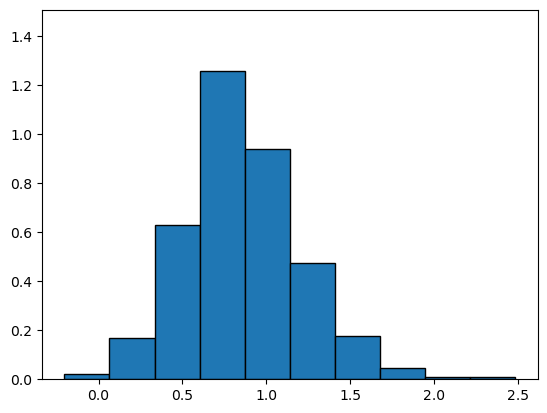

In [10]:
data_bootstrap = []
for _ in range(N):
    d = []
    for _ in range(len(data)):
        d.append(rd.choice(data))
    mu3 = M([(x - M(d))**3 for x in d])
    mu2 = M([(x - M(d))**2 for x in d])
    data_bootstrap.append(mu3/(mu2)**1.5)

maximim = 0
_, _, rec = plt.hist(data_bootstrap, bins = k1, ec='k')
for r in rec:
    r.set_height(r.get_height()/len(data_bootstrap)/r.get_width())
    maximim = max(maximim, r.get_height())
    
plt.ylim([0, maximim + 0.25])
plt.show() # bootstrap для коэффициента симметрии

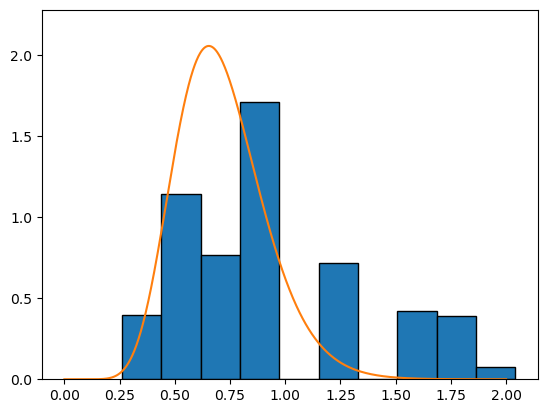

In [11]:
def h(t):
    return n * (factorial(24)/(factorial(12)*factorial(12))) * exp(-13*t)* (1-exp(-t))**12

data_bootstrap = []
for _ in range(N):
    d = []
    for _ in range(len(data)):
        d.append(rd.choice(data))
    data_bootstrap.append(median(d))

_, _, rec = plt.hist(data_bootstrap, bins = k1, ec='k')
maximim = 0
for r in rec:
    r.set_height(r.get_height()/len(data_bootstrap)/r.get_width())
    maximim = max(maximim, r.get_height())
    
plt.ylim([0, max(maximim, max([h(x) for x in d])) + 0.25])

X = np.linspace(0, 2, N)
Y = np.array([h(x) for x in X])
plt.plot(X, Y)
plt.show() # bootstrap для медианы